<a href="https://colab.research.google.com/github/RojaCM/MACHINE-LEARNING-ROJA/blob/main/Random%20forest%20classifier%20-%20Penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=sns.load_dataset('penguins')

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

#Dealing with Missing Data in Scikit-Learn
When dealing with missing values, you have two main options:

Impute the missing values
Drop the missing records (either column-wise or row-wise)

In [10]:
#imputing missing values
from sklearn.impute import SimpleImputer

In [14]:
import numpy as np
#create a simpleimputer class
impute=SimpleImputer(missing_values=np.NaN,strategy='mean')

cols=['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',	'body_mass_g']

df[cols]=impute.fit_transform(df[cols])

# Fit the columns to the object

In [15]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,NaN
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,Female
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,Male
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,Female


In [20]:
#Imputing categorical data can be a lot more complicated, especially when dealing with binary distributions. Because of this, we’ll drop any of the records where sex is missing:
#dropping the missing records in the sex column
df = df.dropna(subset=['sex'])

In [21]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#Dealing with Categorical Data in Scikit-Learn
Similar to dealing with missing values, machine learning models can also generally only work with numerical data. Because of this, we need to convert our categorical data into numerical data. Let’s deal with the sex variable first. Because the sex variable is binary (either male or female), we can assign the vale of either 1 or 0, depending on the sex. This can be done easily with the .map() Series method.

In [23]:
df['sex']=df['sex'].map({'Male':0,'Female':1})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df['sex']

0      0
1      1
2      1
4      1
5      0
      ..
338    1
340    1
341    0
342    1
343    0
Name: sex, Length: 333, dtype: int64

In the code above, you passed a dictionary into the .map() method. The dictionary contained a binary mapping for either 'Male' or 'Female'.

The other categorical value is the 'island' feature. Let’s see what the unique values in this column are

In [25]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In the case of the 'island' feature, there are three values. Because of this we can’t simply pass in a binary mapping. Similarly, passing in values of 0, 1, 2 would also present problems, because the values don’t actually imply a hierarchy. The difference between 0 and 2 would amplify any decisions our random forest would make.

Scikit-Learn comes with a helpful class to help you one-hot encode your categorical data. This class is called the OneHotEncoder and is part of the sklearn.preprocessing module. Let’s see how you can use this class to one-hot encode the 'island' feature:

In [32]:
dummy=pd.get_dummies(df['island'],drop_first=True)

In [33]:
df=pd.concat([df,dummy],axis=1)

In [34]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0,0,0,1,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1,0,0,1,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1,0,0,1,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1,0,0,1,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1,1,0,0,0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1,1,0,0,0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0,1,0,0,0,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1,1,0,0,0,0


In [35]:
df.drop(['Biscoe',	'Dream',	'Torgersen','island'],axis=1)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,0
1,Adelie,39.5,17.4,186.0,3800.0,1
2,Adelie,40.3,18.0,195.0,3250.0,1
4,Adelie,36.7,19.3,193.0,3450.0,1
5,Adelie,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,1
340,Gentoo,46.8,14.3,215.0,4850.0,1
341,Gentoo,50.4,15.7,222.0,5750.0,0
342,Gentoo,45.2,14.8,212.0,5200.0,1


In [36]:
df=pd.concat([df,dummy],axis=1)

In [38]:
df.drop(dummy,axis=1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0,0
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1,1


In [44]:
df.drop(['Biscoe','Dream','Torgersen','Dream','Torgersen','Dream','Torgersen'],axis=1,inplace=True)

In [45]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


In [47]:
df=pd.concat([df,dummy],axis=1)

In [48]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0,0,1
...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1,0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1,0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0,0,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1,0,0


In [66]:
#Creating Your First Random Forest: Classifying Penguins
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df.drop('island',axis=1,inplace=True)

In [67]:
x=df.iloc[:,1:]

In [68]:
x

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,1
2,40.3,18.0,195.0,3250.0,1,0,1
4,36.7,19.3,193.0,3450.0,1,0,1
5,39.3,20.6,190.0,3650.0,0,0,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0,0
340,46.8,14.3,215.0,4850.0,1,0,0
341,50.4,15.7,222.0,5750.0,0,0,0
342,45.2,14.8,212.0,5200.0,1,0,0


In [69]:
y=df['species']

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [71]:
forest = RandomForestClassifier(n_estimators=100, random_state=100)

In [72]:
forest.fit(x_train,y_train)

RandomForestClassifier(random_state=100)

In [73]:
pred=forest.predict(x_test)

In [75]:
#Evaluating the Performance of a Random Forest in Scikit-Learn
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.99

In [79]:
#visualizing Random Forest Decision Trees in Scikit-Learn:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


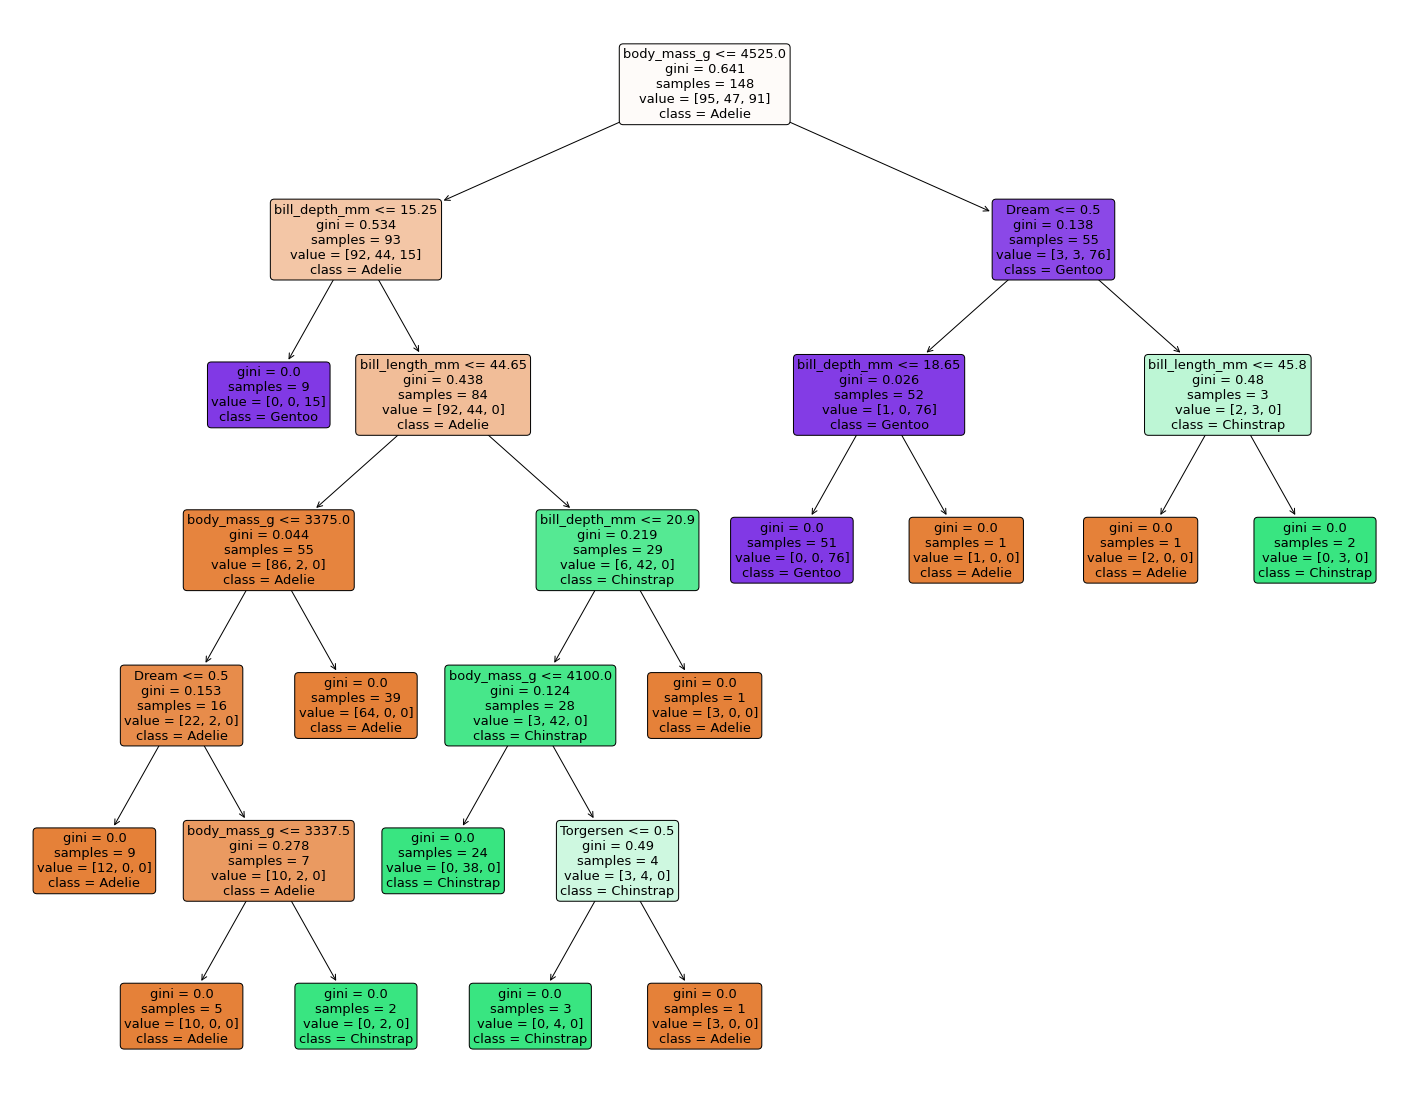

In [84]:
from numpy.ma.core import filled
fig=plt.figure(figsize=(25,20))
plot_tree(forest.estimators_[0], 
          feature_names=x.columns,
          class_names=df['species'].unique(), 
          filled=True, rounded=True)
plt.show()

In [86]:
forest.feature_importances_

array([0.32649343, 0.2011857 , 0.20902758, 0.12393629, 0.00559964,
       0.1094821 , 0.02427527])

In [88]:
importances=pd.Series(forest.feature_importances_,index=x.columns)

In [89]:
importances

bill_length_mm       0.326493
bill_depth_mm        0.201186
flipper_length_mm    0.209028
body_mass_g          0.123936
sex                  0.005600
Dream                0.109482
Torgersen            0.024275
dtype: float64

In [90]:
importances.sort_values(ascending=False)

bill_length_mm       0.326493
flipper_length_mm    0.209028
bill_depth_mm        0.201186
body_mass_g          0.123936
Dream                0.109482
Torgersen            0.024275
sex                  0.005600
dtype: float64